# Data Preprocessing [PRACTICAL]

_Demonstrating preprocessing (data cleaning, integration and transformation) activities on suitable data. Data cleaning process includes identifying and deleting rows that contain duplicate data, and identifying and deleting Columns that contain a single value._

In [2]:
# imports libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import matplotlib.pyplot as plt

## Having a Quick Look into the Data

In [3]:
# Loads data into Dataframe

housing = pd.read_csv("./../Data/housing/housing.csv")

In [5]:
# Having a quick look at the data

display(housing)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
# Looking at the basic information such as about the data

print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [7]:
# Looking at the statistics for the non-numeric values

print(housing.ocean_proximity.value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [8]:
# Looking a the basic statistics about the data

display(housing.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


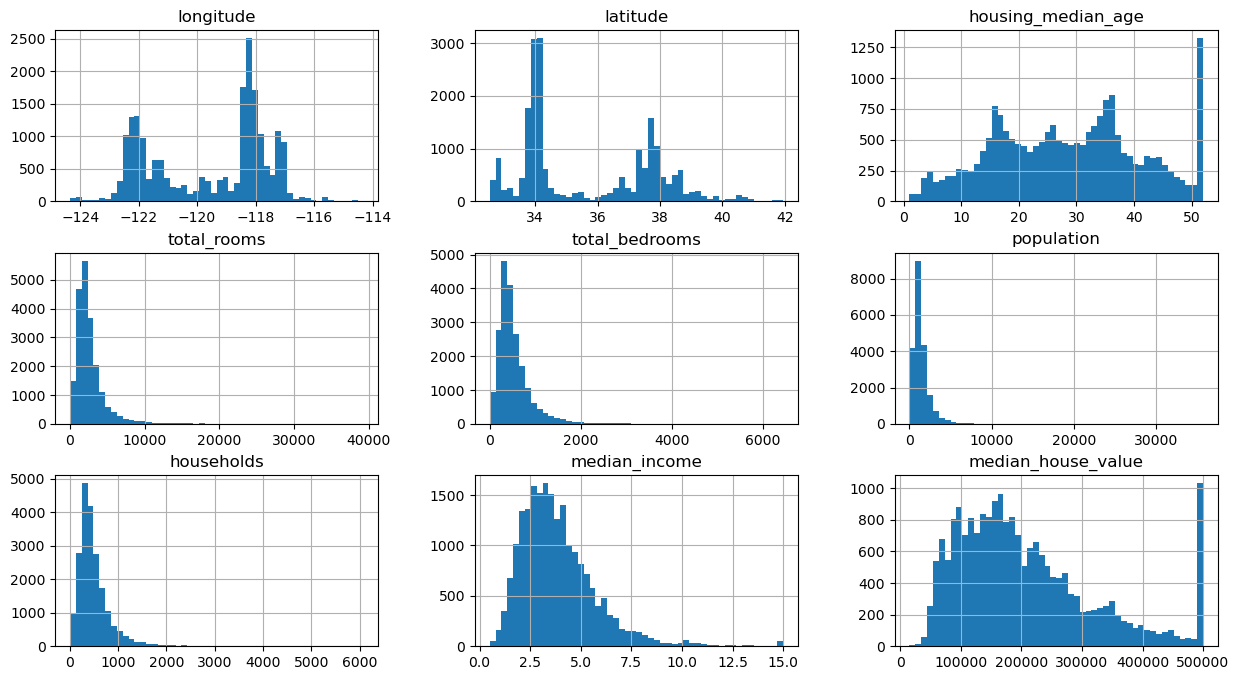

In [9]:
# Looking at the data distributions

housing.hist(bins=50, figsize=(15,8))
plt.show()

**Observations from the information, statistics and histograms:**

1) There are null values against attribute 'total_bedrooms'.
2) 'median_income' is in different scale.
3) 'house_median_age', 'median_income' and 'median_house_value' is capped to 50, 15 and 500000, respectively.
4) Attributes, in general, are in different scales.
5) Histograms are tail-heavy

## Cleaning Data

**Removing duplicate observations**

In [10]:
# Checks for duplicate observations
duplicate_count = sum(housing.duplicated())
print("There are", duplicate_count, "duplicates in the datsset")

# Deletes the duplicate data, if found
if duplicate_count > 0:
    housing.drop_duplicates(inplace=True)
    print("\n\tDuplicate observations were deleted.")
    # Prints the shape of data before removal of duplicate
    print("\n\tData shape after duplicate removal:", housing.shape)

There are 0 duplicates in the datsset


**Removing single-valued columns**

In [11]:
# Gets number of unique values for each column
unique_values_per_attrib = housing.nunique()

# Records columns to delete
single_value_columns = [i for i, value_count in enumerate(unique_values_per_attrib) if value_count == 1]
print("There are", len(single_value_columns), "single_valued columns in the datsset")

# Deletes single-value columns, if exist
if len(single_value_columns) > 0:
    housing.drop(single_value_columns, axis=1, inplace=True)
    print("\n\tSingle-valued columns were removed.")
    # Prints the shape of data after removal of single-value columns
    print("\n\tData shape after single-value column removal:", housing.shape)

There are 0 single_valued columns in the datsset


## Creating Test Set

In [12]:
# Creating test set using random sampling method to select observerations into 
# train and test datasets.

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## Preparing Data

In [13]:
# Seperates labels from features

housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

### Handling Missing Values

Though the missing values are there only in attribute 'total_bedrooms', but all the numeric columns are made available to Imputer so that it can impute missing values in any attributes in testing dataset.

In [14]:
# Instantiates imputer
imputer = SimpleImputer(strategy="median")

# Considers only numeric columns as the imputer works on numeric data
housing_num = housing.drop("ocean_proximity", axis=1)

# Fits and then Transforms the missing values in each column with learned median
X_train_num = imputer.fit_transform(housing_num)

### Scaling Features

As machine learning algorithms don't work well with (numerical) attributes having different scales, let's apply scaling transformations to numeric attributes using StandardScaler.

In [15]:
# Instantiate standard scaler
std_scaler = StandardScaler()

# Fits and then Transforms to scale numeric attributes using standardization
X_train_num = std_scaler.fit_transform(X_train_num)

In [16]:
print("Shape of the transformed dataset with only numerical attributes is", 
      X_train_num.shape)

Shape of the transformed dataset with only numerical attributes is (16512, 8)


### Encoding Categorical Attributes

Encodes the only categorical attribute 'ocean_proximity' using One-Hot encoding

In [18]:
# Instantiate encoder
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat = housing[["ocean_proximity"]]

# Fits and then Transforms the categorical values into one-hot-encoded columns
X_train_cat = cat_encoder.fit_transform(housing_cat)

In [19]:
# Shows one-hot encoded information in densed array form

print(X_train_cat)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [20]:
# Shows the ordered list of categories related to one-hot encoding

print(cat_encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


Now, instead of transforming numeric and non-numeric attributes idividually and then integrating back, transformation pipelines that can take care of tranforming both these different types of attributes in an integrated way can be used as shown below.

### Combining Transformed Data

In [21]:
X_train = np.append(X_train_num, X_train_cat, axis=1)

In [22]:
# Shows how X_train looks like
display(
    pd.DataFrame(
        X_train, 
        index=housing_num.index,
        columns=list(housing_num.columns)+list(cat_encoder.categories_[0])
    )
)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,1.172993,-1.350415,0.428537,1.570557,1.376799,1.081011,1.507507,0.379698,0.0,0.0,0.0,0.0,1.0
8267,1.268028,-1.378536,-1.473509,-0.809439,-0.900718,-0.643842,-0.878707,0.420068,0.0,0.0,0.0,0.0,1.0
17445,-1.352939,0.988349,-0.046974,1.994289,2.441082,1.363196,2.593828,-0.092320,0.0,0.0,0.0,1.0,0.0
14265,-1.127856,0.758691,-0.284730,0.646558,0.230833,0.661262,0.394820,0.682999,1.0,0.0,0.0,0.0,0.0
2271,1.793222,-1.083261,-1.632013,-1.117906,-1.181804,-1.203802,-1.255755,-1.255560,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-1.402957,1.082087,1.617317,-0.777706,-0.742156,-0.731143,-0.804879,-1.335305,0.0,0.0,0.0,1.0,0.0
11964,0.592779,-0.816108,0.507789,-0.400173,-0.499510,-0.613860,-0.496385,1.421304,1.0,0.0,0.0,0.0,0.0
5390,0.117604,0.304062,-0.997998,-0.005374,-0.026228,-0.309630,0.052048,-0.911522,0.0,1.0,0.0,0.0,0.0
860,1.187999,-0.727057,-0.522486,-0.078641,0.041040,0.122465,-0.016506,-0.634382,0.0,1.0,0.0,0.0,0.0


### Transforming Test Data

In [23]:
# Seperating test labels from test dataset before transformations

# And, then dropping the labels from the test dataset
housing_test = test_set.drop("median_house_value", axis=1)

# Storing labels in a seperate series
housing_test_labels = test_set["median_house_value"].copy()

**Handling Missing Values**

In [24]:
# Considers only numeric columns as the imputer works on numeric data
housing_test_num = housing_test.drop("ocean_proximity", axis=1)

# Transforms the missing values in each column with learned median
X_test_num = imputer.transform(housing_test_num)

**Scaling Features**

In [25]:
# Transforms to scale numeric attributes using standardization
X_test_num = std_scaler.transform(X_test_num)

**Encoding Categorical Attributes**

In [26]:
housing_test_cat = housing_test[["ocean_proximity"]]

# Transforms the categorical values into one-hot-encoded columns
X_test_cat = cat_encoder.transform(housing_test_cat)

**Combining Transformed Data**

In [27]:
X_test = np.append(X_test_num, X_test_cat, axis=1)

In [28]:
# Shows how X_test looks like
display(
    pd.DataFrame(
        X_test, 
        index=housing_test_num.index,
        columns=list(housing_test_num.columns)+list(cat_encoder.categories_[0])
    )
)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,-1.407959,2.361612,-1.473509,-0.165440,-0.225631,-0.135910,-0.164161,-0.865909,0.0,1.0,0.0,0.0,0.0
3024,0.597781,-0.844229,0.507789,-0.666640,-0.795010,-0.729379,-0.757419,0.454671,1.0,0.0,0.0,0.0,0.0
15663,1.162989,-1.364476,0.824797,0.211626,-0.256863,-0.223211,-0.179981,1.955030,0.0,0.0,0.0,0.0,1.0
20484,0.562768,-0.741118,-0.839494,1.000758,1.571397,0.403768,1.412586,0.316574,1.0,0.0,0.0,0.0,0.0
9814,0.562768,-0.680188,0.349286,-0.237307,-0.297704,-0.328148,-0.288086,0.268129,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-1.177874,2.291308,-1.235754,0.907891,0.824237,0.327049,0.616302,-0.820138,0.0,1.0,0.0,0.0,0.0
16623,-1.257904,0.960228,-0.205478,-0.013307,0.346151,-0.023918,0.281441,-0.632967,0.0,0.0,0.0,1.0,0.0
18086,0.282665,-0.113073,1.062553,0.094959,-0.052655,-0.198520,-0.034963,-0.048646,0.0,1.0,0.0,0.0,0.0
2144,0.822864,-0.937967,0.824797,-0.544373,-0.749364,-0.771707,-0.725778,2.089825,1.0,0.0,0.0,0.0,0.0


Now, after the transformation of both train and test datasets X_train and X_test, appropriate machine learning model(s) can be trained over the train dataset, and can be tested against test dataset to receive estimation of error.